## Imports

In [1]:
import pandas as pd
from IPython.display import IFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
import torch

## Dataset

##### *Features*

In [2]:
dt = pd.read_csv("data_project_nel.csv")
dt

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
0,7,7.750000,414,56.0,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0
1,8,9.083333,357,78.0,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0
2,6,7.666667,315,69.0,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8
3,7,8.666667,362,69.0,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2
4,5,6.500000,427,58.0,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,1.916667,291,NaN,3.765704,557.993151,35.426804,3.178905,2.563574,1.206434,0.0,0.000000,0.079088,0.0
320,1,1.750000,310,NaN,3.836903,549.466238,36.584194,1.633004,2.951613,2.622951,0.0,0.000000,0.240437,0.0
321,1,1.833333,293,NaN,3.755973,579.557823,37.039590,1.864855,2.747440,3.726708,0.0,0.000000,0.150311,0.0
322,1,1.666667,293,NaN,3.939010,546.159864,36.980546,3.395705,3.112628,1.535088,0.0,0.000000,0.195175,0.0


In [3]:
dt.columns

Index(['lactation', 'delivery_age_years', 'dim', 'dry_days', 'forage_kg_day',
       'rumination_min_day', 'milk_kg_day', 'milk_kg_min_robot',
       'milkings_day', 'errors_by_100_milkings', 'high_cdt_by_100_milkings',
       'watery_by_100_milkings', 'refusals_by_milking',
       'colostrum_separated_kg'],
      dtype='object')

In [4]:
IFrame('nel_data_dictionary.pdf', width=1000, height=300)


In [5]:
dt.describe()

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
count,324.000000,324.000000,324.000000,177.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,2.055556,3.040895,327.617284,65.440678,4.657507,527.641508,39.585367,2.806910,2.969289,1.746837,0.202839,0.067426,0.257540,11.773148
std,1.320240,1.432558,46.261491,9.349777,0.585053,53.863379,6.698681,0.839749,0.552387,3.505659,1.045158,0.381647,0.248818,15.401783
min,1.000000,1.666667,249.000000,22.000000,2.887079,316.874074,15.355600,0.951521,2.016340,0.000000,0.000000,0.000000,0.003241,0.000000
25%,1.000000,1.916667,296.000000,61.000000,4.318435,490.580690,34.709342,2.147157,2.529756,0.152436,0.000000,0.000000,0.084442,0.000000
50%,2.000000,2.750000,313.500000,66.000000,4.672403,537.830980,39.510841,2.787723,2.940860,0.786993,0.000000,0.000000,0.187785,5.800000
75%,3.000000,3.750000,346.250000,70.000000,5.012795,566.156378,43.973411,3.344835,3.391920,1.582636,0.000000,0.000000,0.346494,20.200000
max,8.000000,9.083333,590.000000,112.000000,6.340225,638.546053,59.722312,5.526386,5.024390,36.382323,13.333333,3.826955,1.520631,82.500000


Check for missing values

In [6]:
dt.isna().sum()

lactation                     0
delivery_age_years            0
dim                           0
dry_days                    147
forage_kg_day                 0
rumination_min_day            0
milk_kg_day                   0
milk_kg_min_robot             0
milkings_day                  0
errors_by_100_milkings        0
high_cdt_by_100_milkings      0
watery_by_100_milkings        0
refusals_by_milking           0
colostrum_separated_kg        0
dtype: int64

In [7]:
# Como tratar estes missing values.
# dry_days - periodo depois da latancia ( os missing values são so os primeiros )

Basic exploratory plots

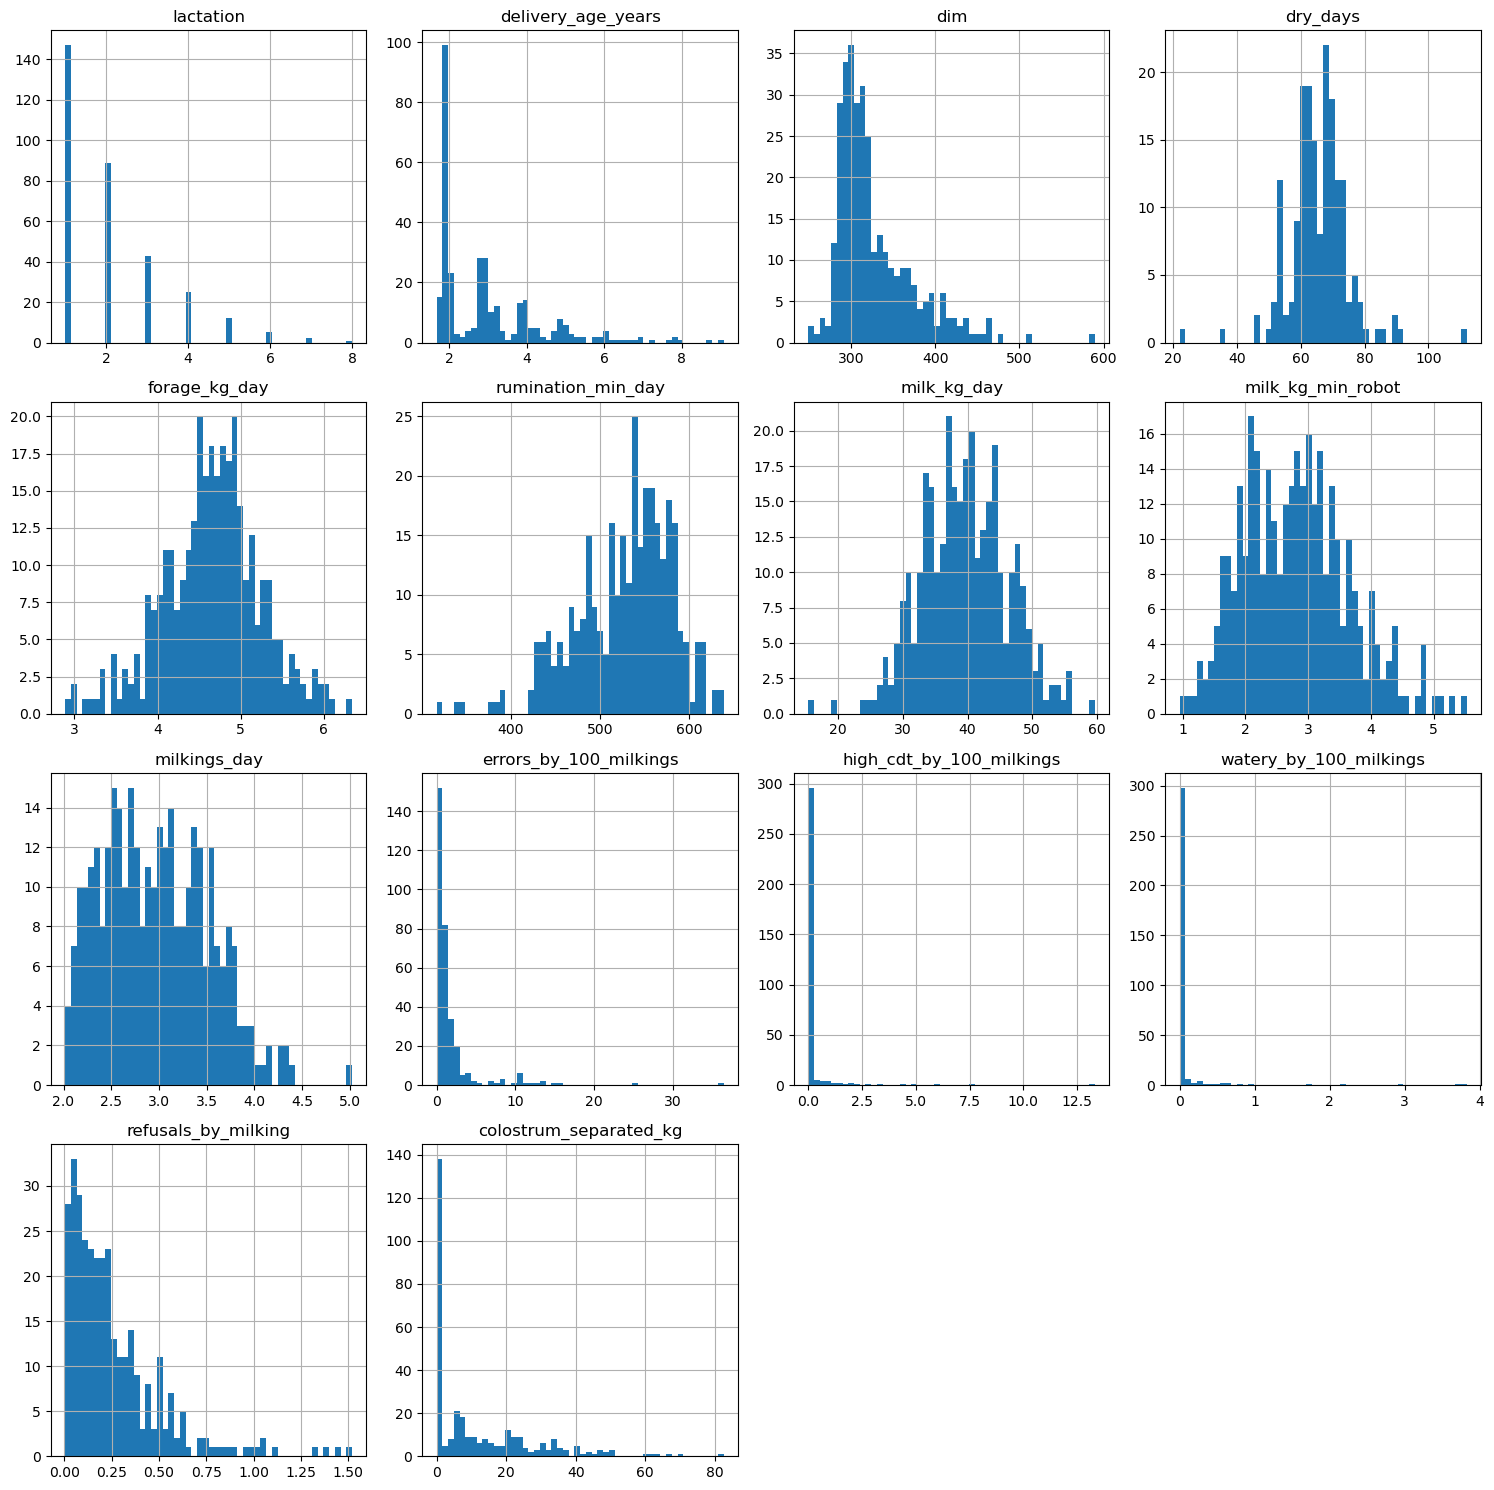

In [8]:
dt.hist(figsize=(15, 15), bins=50)
plt.grid(False)
plt.tight_layout()
plt.show()


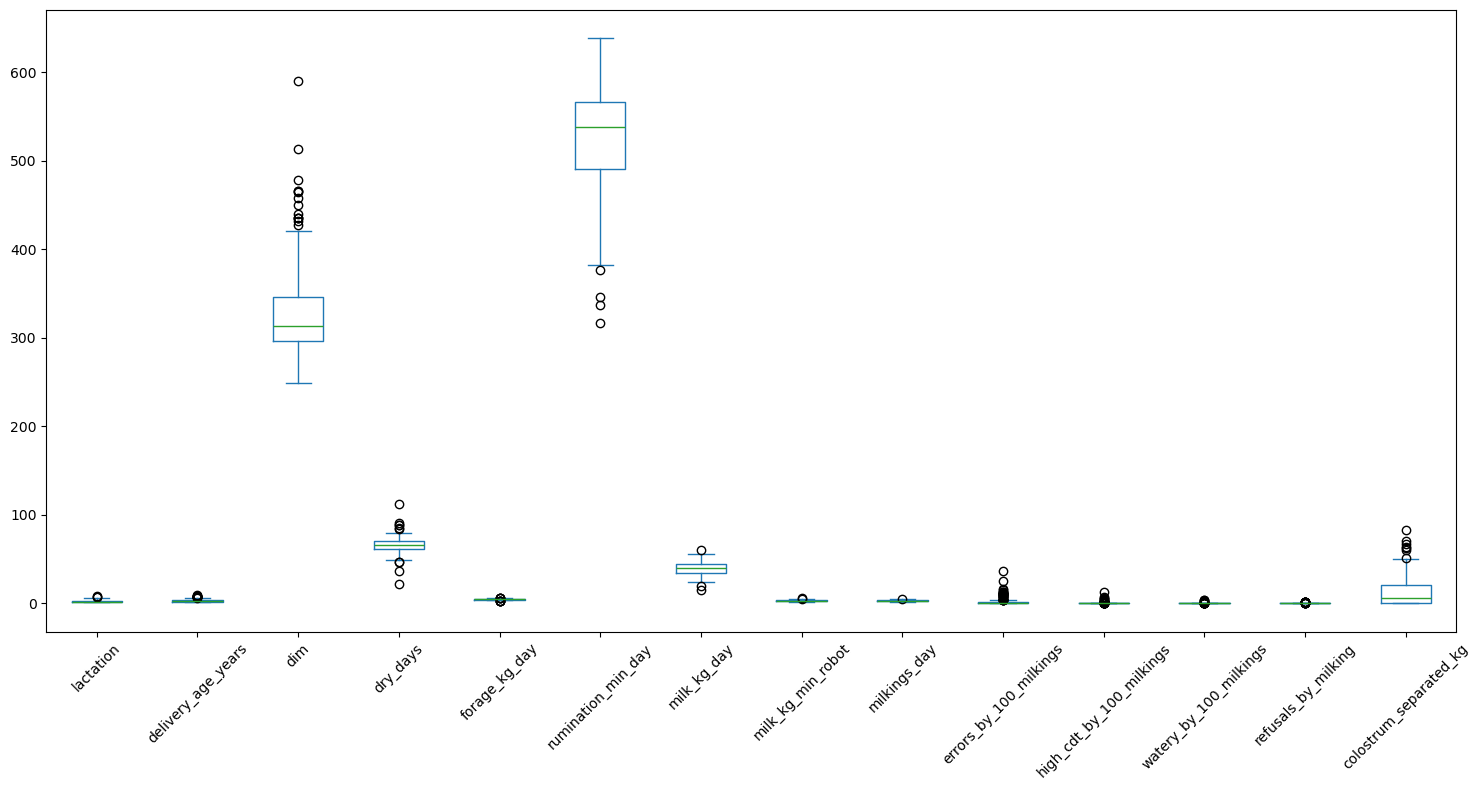

In [9]:
dt.plot(kind='box', figsize=(15, 8))
plt.xticks(ticks=range(1, len(dt.columns) + 1), labels=dt.columns, rotation=45)
plt.tight_layout()
plt.show()


##### *Targets*

In [10]:
y = pd.read_csv("y_lactose.csv")

In [11]:
y.shape

(324, 1)

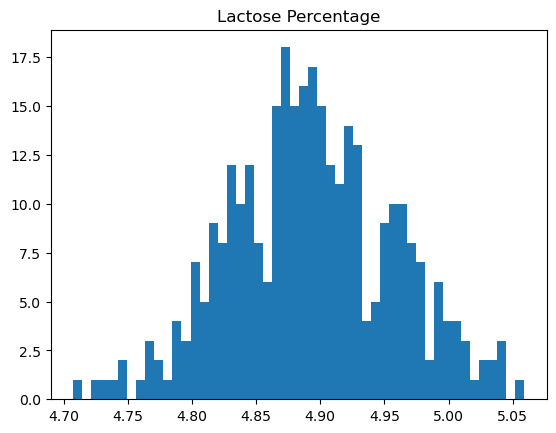

In [12]:
plt.hist(y, bins=50, color='tab:blue')
plt.title('Lactose Percentage')
plt.show()


### Treating missing values

In [13]:
dt.isna().sum()

lactation                     0
delivery_age_years            0
dim                           0
dry_days                    147
forage_kg_day                 0
rumination_min_day            0
milk_kg_day                   0
milk_kg_min_robot             0
milkings_day                  0
errors_by_100_milkings        0
high_cdt_by_100_milkings      0
watery_by_100_milkings        0
refusals_by_milking           0
colostrum_separated_kg        0
dtype: int64

In [14]:
dt = dt.drop(columns=['dry_days'])

We will continue the project wihtout this feature.

### Treating duplicates

In [15]:
dt.duplicated().sum()

0

There are no dulpicates in the dataset.

### Treating outliers

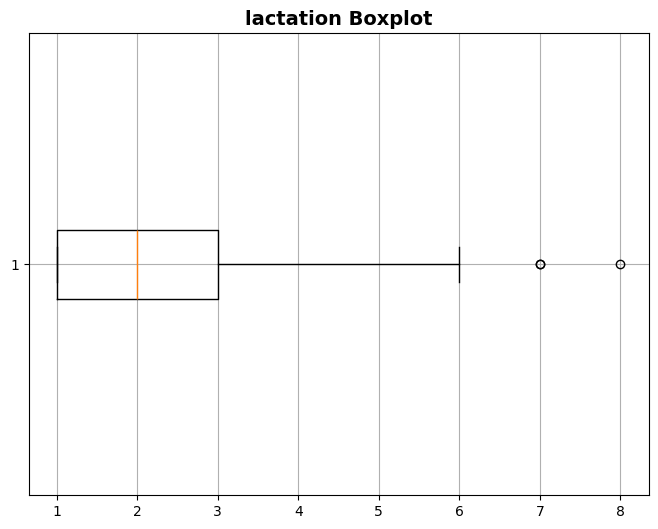

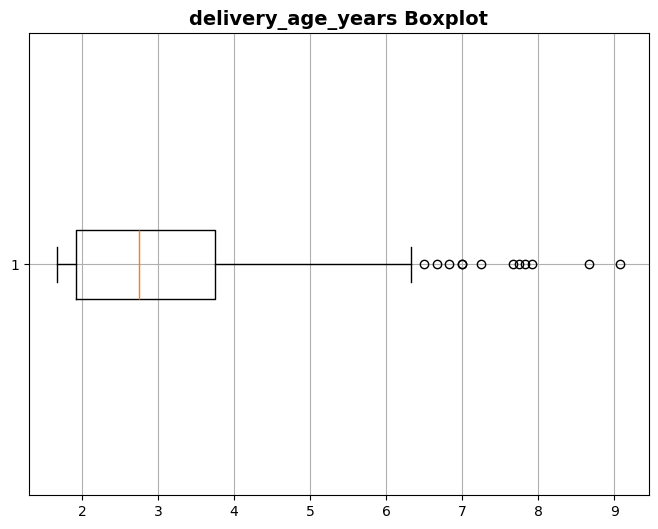

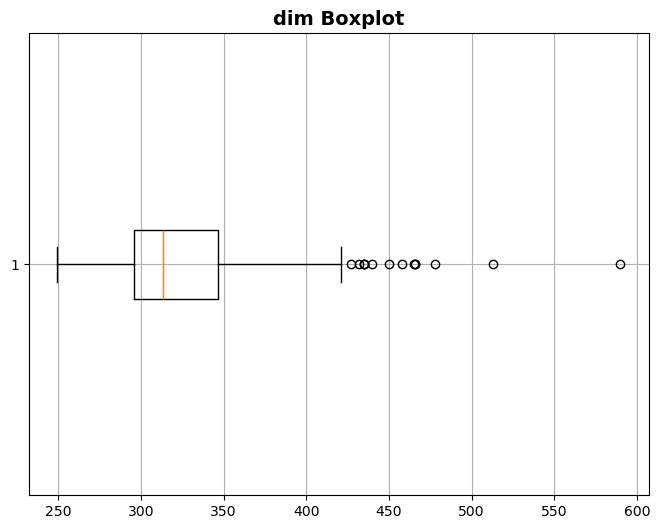

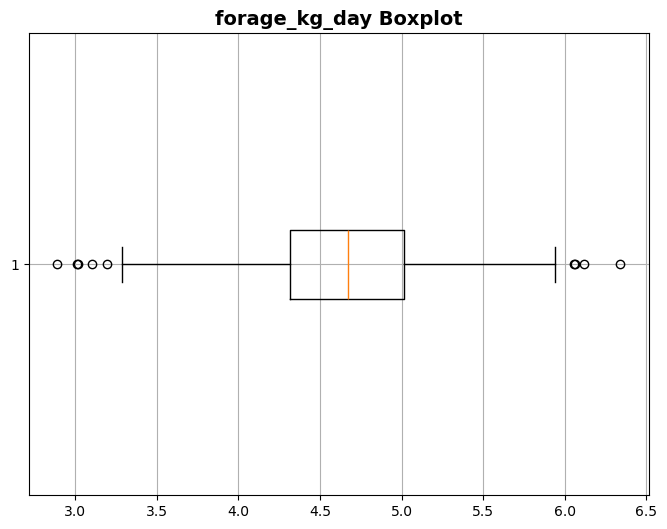

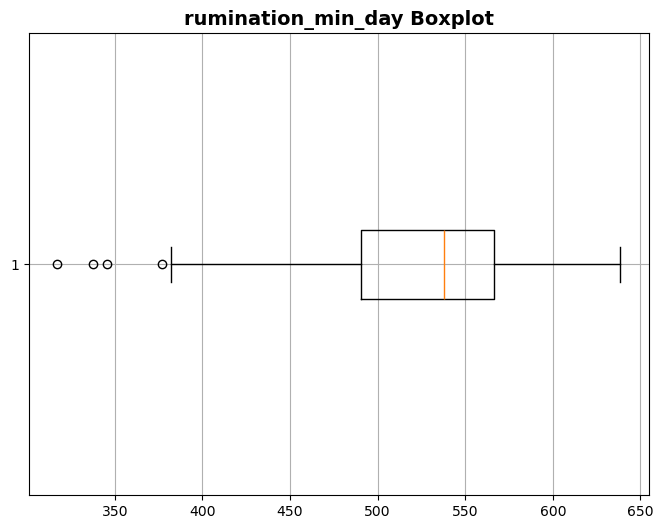

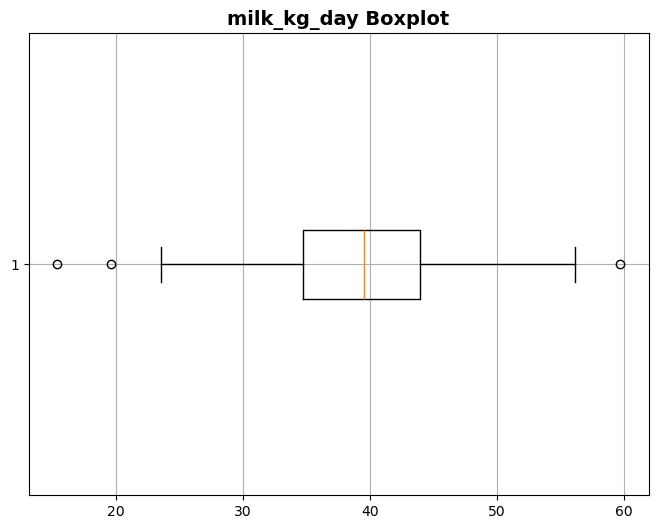

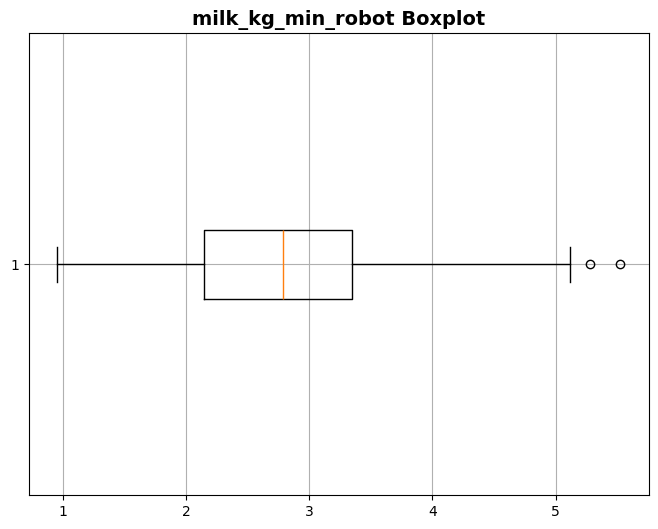

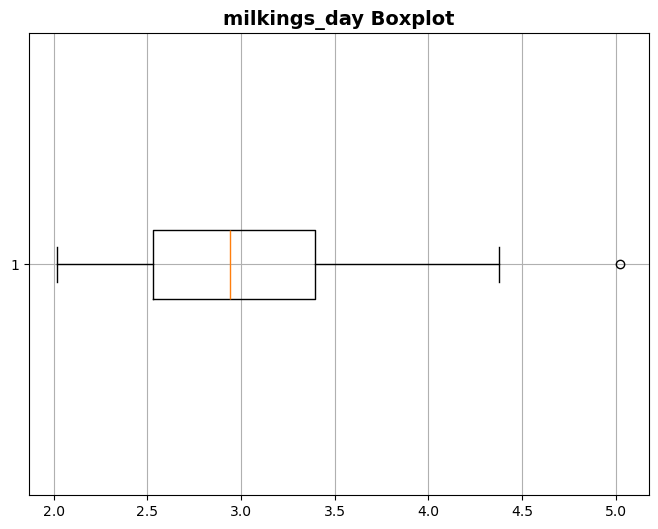

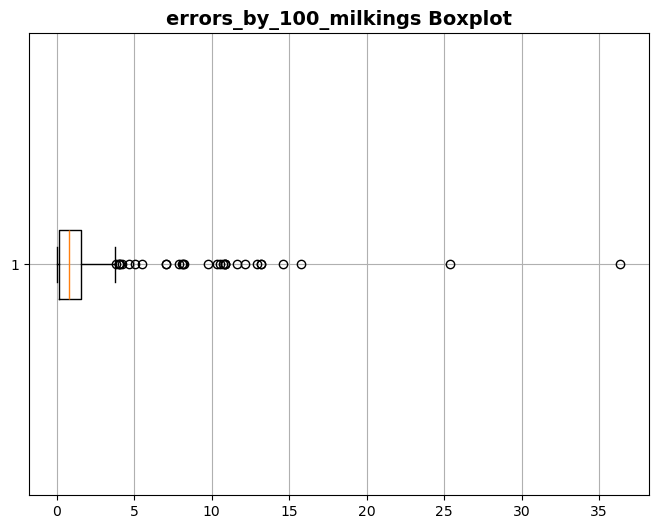

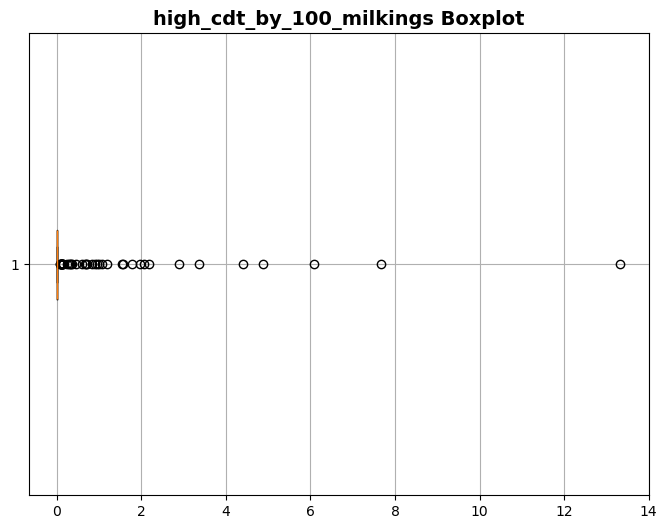

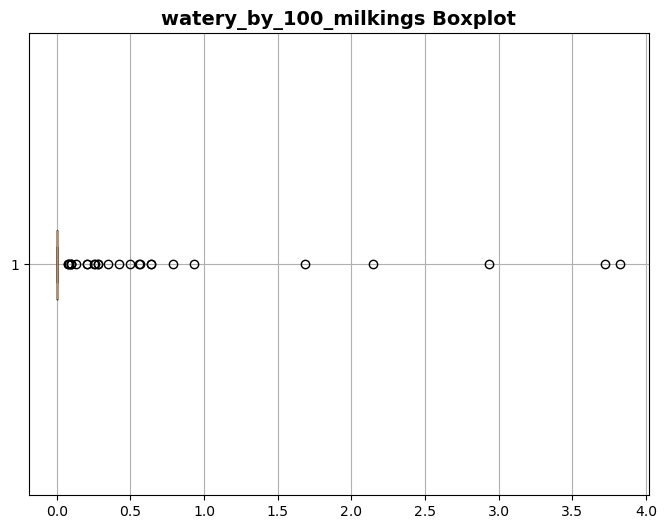

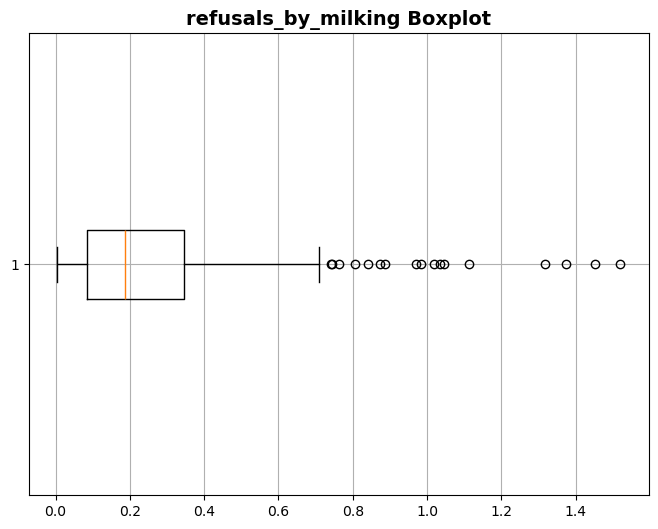

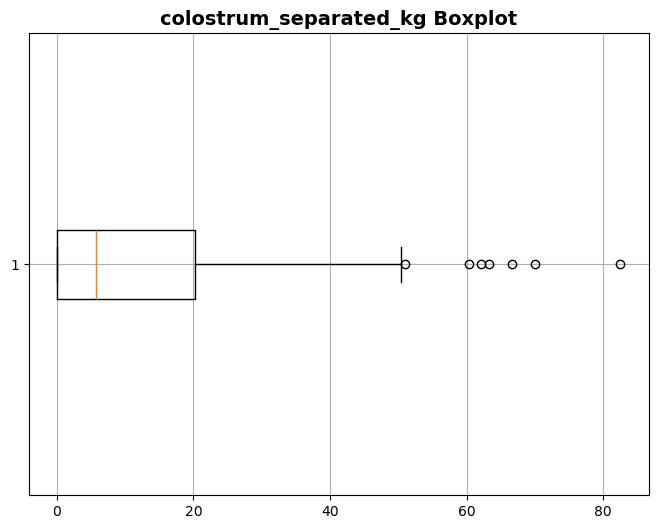

In [16]:
for i in dt:
    plt.figure(figsize=(8, 6))
    plt.boxplot(dt[i], vert=False)
    plt.xlabel('')
    plt.title(f'{i} Boxplot', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.show()

Manually removal of outliers, based on the boxplots:

In [17]:
# Print initial lengths
print("Initial length of dt:", len(dt))
print("Initial length of y:", len(y))

filters1 = (
    (dt['dim']<=550)
    &
    (dt['errors_by_100_milkings']<=20)
    &
    (dt['high_cdt_by_100_milkings']<=6)
    &
    (dt['watery_by_100_milkings']<=1.5)
    &
    (dt['refusals_by_milking']<=1.2)
    &
    (dt['colostrum_separated_kg']<= 80)
)

dt_new2 = dt[filters1]
print('Percentage of data kept after removing outliers:', np.round(dt_new2.shape[0] / dt.shape[0], 4))
#Apply the filter
dt = dt_new2

# Filter y using the same indices as the filtered dt
y = y.loc[dt.index]

# Ensure y is a numpy array
y = y.values.flatten()

# Print lengths after filtering
print("Length of dt after filtering:", len(dt))
print("Length of y after filtering:", len(y))

Initial length of dt: 324
Initial length of y: 324
Percentage of data kept after removing outliers: 0.9568
Length of dt after filtering: 310
Length of y after filtering: 310


In [18]:
#Apply the filter
dt = dt_new2

### Inconsistencies

In [19]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 323
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lactation                 310 non-null    int64  
 1   delivery_age_years        310 non-null    float64
 2   dim                       310 non-null    int64  
 3   forage_kg_day             310 non-null    float64
 4   rumination_min_day        310 non-null    float64
 5   milk_kg_day               310 non-null    float64
 6   milk_kg_min_robot         310 non-null    float64
 7   milkings_day              310 non-null    float64
 8   errors_by_100_milkings    310 non-null    float64
 9   high_cdt_by_100_milkings  310 non-null    float64
 10  watery_by_100_milkings    310 non-null    float64
 11  refusals_by_milking       310 non-null    float64
 12  colostrum_separated_kg    310 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 33.9 KB


In [20]:
dt.describe()

,lactation,delivery_age_years,dim,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,2.035484,3.013172,326.500000,4.652202,527.935532,39.525412,2.797355,2.956252,1.566809,0.110379,0.023958,0.245585,11.697419
std,1.310413,1.416193,43.909052,0.589444,54.086631,6.678435,0.837267,0.537667,2.635616,0.514894,0.109833,0.214670,15.089734
min,1.000000,1.666667,249.000000,2.887079,316.874074,15.355600,0.951521,2.016340,0.000000,0.000000,0.000000,0.003241,0.000000
25%,1.000000,1.916667,296.250000,4.301467,491.137222,34.702685,2.145612,2.525684,0.160046,0.000000,0.000000,0.083914,0.000000
50%,2.000000,2.750000,313.000000,4.672403,538.341722,39.469429,2.787723,2.937027,0.760818,0.000000,0.000000,0.187302,5.750000
75%,3.000000,3.750000,346.000000,5.006509,566.012784,43.922325,3.333224,3.364798,1.575673,0.000000,0.000000,0.344804,20.200000
max,8.000000,9.083333,513.000000,6.340225,638.546053,59.722312,5.526386,4.378049,15.754190,4.876033,0.929615,1.113010,70.000000


In [21]:
dt['colostrum_separated_kg'].unique()

array([ 0. , 12.8, 16.2, 20.2, 14.4, 29.8, 47. ,  9.4, 17.2, 43.9, 34.5,
       66.7, 63.2, 47.8,  8.1, 28.3,  8.3, 13. , 33.4, 51. , 31.4, 36.3,
       50. , 48. , 10.7, 39.8, 42.6, 36.9, 48.7, 29.6, 25.9, 41.2,  9.6,
       37.4, 20.9,  6.4, 22.2, 43.7, 22.6, 22.1, 40.1, 24.7, 11.3, 30.8,
       32.1, 15.9, 62.1, 15.4, 23.8, 20.4,  9.9, 24.6, 33.5, 31.2, 18.2,
       15.8, 28.5, 31.6, 44.6, 30.5,  8. ,  5.2, 34.3,  8.6, 70. , 50.4,
        7.2, 12.5, 21.9, 34.4, 18.4,  8.8,  7.3, 23.3, 11.1, 20.3,  5.4,
       27.9,  5.5,  7.6, 10.6,  3.4,  2.8,  5.8, 36. ,  8.2,  5.7, 25.4,
       35.4, 12. , 34.2,  4.2, 22.3, 17.6,  6.6, 60.4, 35.5,  5.9,  7.7,
       33.3, 27.8,  6.3,  8.4, 11.5,  7.1, 26. , 22.9, 14.8, 23.9, 20.5,
        4.1, 13.6,  5. , 24.9, 13.9, 14.1,  6.8, 11.9, 14. , 10.8, 23.2,
       19.5, 17.7,  5.1, 35.3,  3.5, 13.4,  4.9, 14.9,  3.7, 10.1, 24.5,
       19. , 10.3, 20.1, 23.6])

Having check the unique values, max and min values, among other values, for each variable, no inconsistencies were found.

### Features engeneering

### Feature selection

#### Person correlation plot*

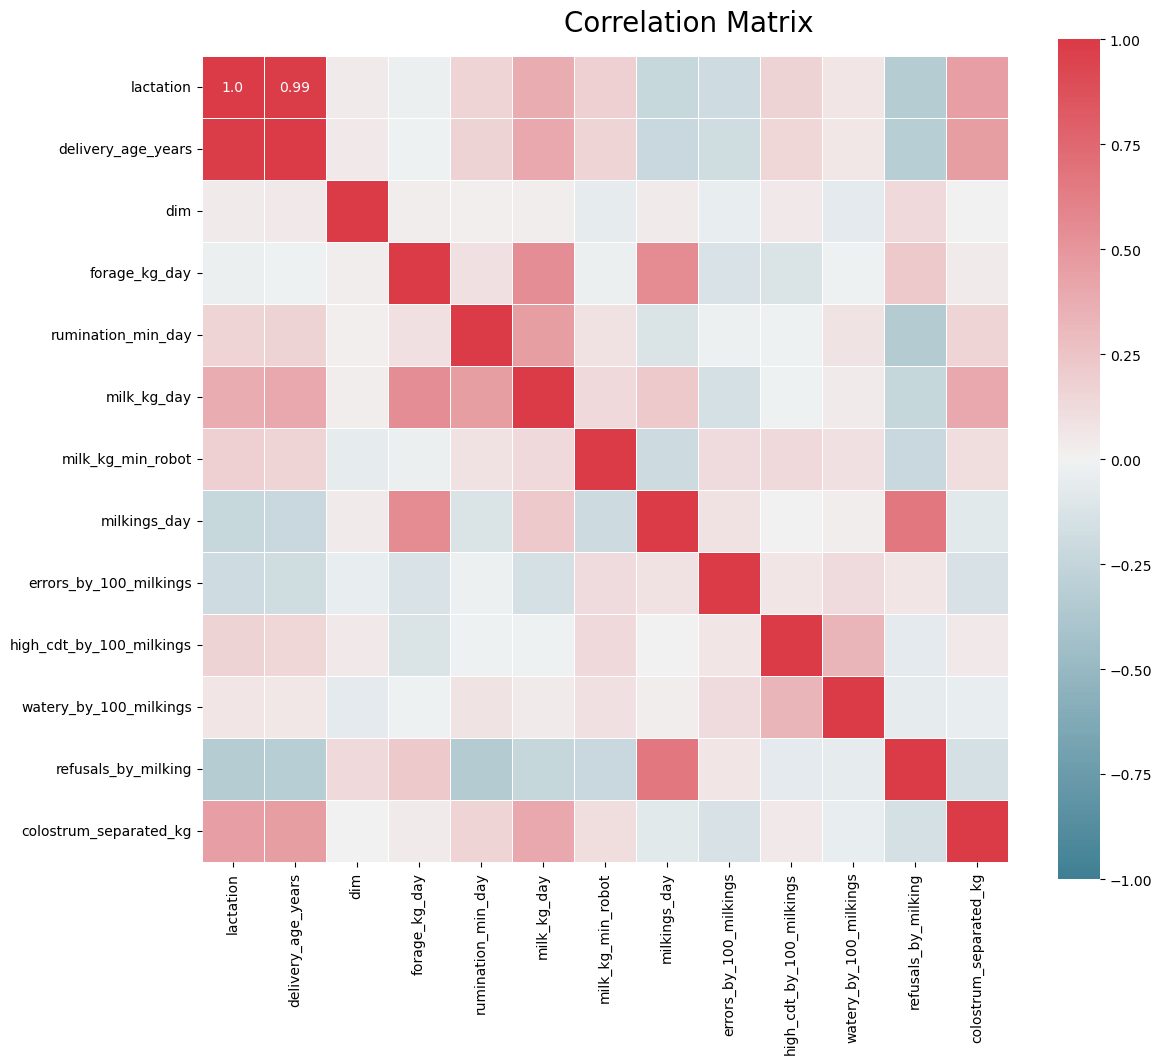

In [22]:
fig = plt.figure(figsize=(13,10))


corr = np.round(dt.corr(method="pearson"), decimals=2)

mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))


sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)


fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

- Lactation period is highly dependant on the age of the cow at the
delivery of the corresponding
lactation period (high correlation » 0.99).

In [23]:
dt = dt.drop('delivery_age_years', axis=1)

## 3. Neural Networks with backpropagation (NN)

In [24]:
# Imports
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
#!pip install tqdm
from tqdm import tqdm
from scipy.stats import wilcoxon
import torch.nn.functional as F

In [25]:
seed = 1
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device = 'cpu'

In [26]:
x = dt.copy()

In [27]:
y = pd.DataFrame(y, columns=['target'])

In [28]:
#Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [29]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    torch.tensor(x.values[:, 1:], dtype=torch.float32), 
    torch.tensor(y.values, dtype=torch.float32),
    test_size=0.3
)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

[X_train.shape, X_val.shape, X_test.shape]

[torch.Size([151, 11]), torch.Size([66, 11]), torch.Size([93, 11])]

In [30]:
# Define datasets for data loaders
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)

# Create the data loaders
train_size = X_train.shape[0]
batch_size_GD = train_size
train_dl_GD = DataLoader(train_ds, batch_size_GD, shuffle=True)
val_dl_GD = DataLoader(val_ds, batch_size_GD, shuffle=True)

batch_size_SGD = 1
train_dl_SGD = DataLoader(train_ds, batch_size_SGD, shuffle=True)
val_dl_SGD = DataLoader(val_ds, batch_size_SGD, shuffle=True)

batch_size_MiniSGD = 32
train_dl_MniSGD = DataLoader(train_ds, batch_size_MiniSGD, shuffle=True)
val_dl_MiniSGD = DataLoader(val_ds, batch_size_MiniSGD, shuffle=True)

print([X_train.shape, y_train.shape], [X_train.dtype, y_train.dtype], [X_train.device, y_train.device])
print([X_val.shape, y_val.shape], [X_val.dtype, y_val.dtype], [X_val.device, y_val.device])
X_train.dtype

[torch.Size([151, 11]), torch.Size([151, 1])] [torch.float32, torch.float32] [device(type='cpu'), device(type='cpu')]
[torch.Size([66, 11]), torch.Size([66, 1])] [torch.float32, torch.float32] [device(type='cpu'), device(type='cpu')]


torch.float32

In [31]:
class Net(nn.Module):    
    def __init__(self):
        # Instantiate the parent (nn.Module) class
        super(Net, self).__init__()
        #
        # 1. 1. Network architecture
        #
        self.fc1 = nn.Linear(11, 5)  
        self.fc2 = nn.Linear(5, 1)
        self.activation = nn.ReLU()
        # Initialize weights
        # The apply method applies the function passed as the apply() argument
        # to each element in the object, that in this case is the neural network.
        self.apply(self._init_weights)
        
    #
    # 1. 2. Weights and bias initialization
    #
    def _init_weights(self, attribute):
        if isinstance(attribute, nn.Linear):
          torch.nn.init.xavier_uniform_(attribute.weight)
          torch.nn.init.zeros_(attribute.bias)
    #
    # 1. 3. Forward pass
    #
    def forward(self, x):
        # For each layer, the output will be the ReLu activation applied to the output of the linear operation
        x = self.activation(self.fc1(x))
        # For the last layer, it is just the linear activation
        x = self.fc2(x)
        return x

    #
    # 1. 4. Training loop
    # Adapted from Raschka, Machine Learning with PyTorch and Scikit-Learn.
    #
    def train(self, num_epochs, loss_fn, optimizer, train_dl, train_size, batch_size, x_valid, y_valid):
        # Initialize weights
        self.apply(self._init_weights)
    
        # Loss and accuracy history objects initialization
        loss_hist_train = [0] * num_epochs
        loss_hist_valid = [0] * num_epochs
        
        # Fit loop
        for epoch in tqdm(range(num_epochs)):
            # Batch learn
            for x_batch, y_batch in train_dl:
                # Get the predictions, the [:,0] reshapes from (batch_size,1) to (batch_size)
                pred = self(x_batch)[:,0]
                # Compute the loss
                loss = loss_fn(pred, y_batch)
                # Back propagate the gradients
                # The `backward()` method, already available in PyTroch, calculates the 
                # derivative of the Error in respect to the NN weights
                # applying the chain rule for hidden neurons.
                loss.backward()
                # Update the weights based on the computed gradients
                optimizer.step()
                # Reset to zero the gradients or else they will accumulate over the mini-batches
                optimizer.zero_grad()
                # Update performance metrics
                loss_hist_train[epoch] += loss.item()
            # Average the results
            loss_hist_train[epoch] /= train_size/batch_size
            # Predict the validation set
            pred = self(x_valid)[:, 0]
            loss_hist_valid[epoch] = loss_fn(pred, y_valid).item()
        return loss_hist_train, loss_hist_valid


    # Not needed normaly, just for mlextend plot
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        return self.forward(x)[:, 0]
        

### Step 1: Instantiate the NNs

In [32]:
# Instantiate the NNs
nn_names = ['GD', 'SGD', 'MiniSGD', 'ASGD', 'RMSprop']
nn_torch = {}
for k in nn_names:
    nn_torch.update({
        k: Net().to(device)
    })

### Step 2: Loss function

In [33]:
#Loss function
loss_fn = nn.L1Loss()

### Step3: Optimizer

In [34]:
# Learning rate
learning_rate = .05

# SGD optmizer
optimizer = {
    
    'GD': torch.optim.SGD(nn_torch['GD'].parameters(), lr=learning_rate),
    'SGD': torch.optim.SGD(nn_torch['SGD'].parameters(), lr=learning_rate),
    'MiniSGD': torch.optim.SGD(nn_torch['MiniSGD'].parameters(), lr=learning_rate),
    
    'ASGD': torch.optim.ASGD(nn_torch['ASGD'].parameters(), lr=learning_rate),
    'RMSprop': torch.optim.RMSprop(nn_torch['RMSprop'].parameters(), lr=learning_rate)
}

### Step 4: NN Fit

In [35]:
num_epochs = 50

history_torch = {'GD': nn_torch['GD'].train(
    loss_fn=loss_fn, 
    optimizer=optimizer['GD'], 
    num_epochs=num_epochs, 
    train_dl=train_dl_GD, 
    train_size=train_size, 
    batch_size=batch_size_GD,
    x_valid=X_val, y_valid=y_val
)}
print('GD train finished\n')

for dl in list(optimizer.keys())[1:]:
    history_torch.update({dl: nn_torch[dl].train(
        loss_fn=loss_fn, 
        optimizer=optimizer[dl], 
        num_epochs=num_epochs, 
        train_dl=train_dl_SGD, 
        train_size=train_size, 
        batch_size=batch_size_SGD,
        x_valid=X_val, y_valid=y_val
    )})
    print(dl+' train finished\n')

  0%|                                                    | 0/50 [00:00<?, ?it/s]/Users/franciscocastro/Desktop/anaconda/anaconda3/envs/MelhorEnvironment/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([151, 1])) that is different to the input size (torch.Size([151])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Users/franciscocastro/Desktop/anaconda/anaconda3/envs/MelhorEnvironment/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([66, 1])) that is different to the input size (torch.Size([66])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 210.82it/s]


GD train finished



  0%|                                                    | 0/50 [00:00<?, ?it/s]/Users/franciscocastro/Desktop/anaconda/anaconda3/envs/MelhorEnvironment/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
100%|███████████████████████████████████████████| 50/50 [00:06<00:00,  8.03it/s]


SGD train finished



100%|███████████████████████████████████████████| 50/50 [00:04<00:00, 10.66it/s]


MiniSGD train finished



100%|███████████████████████████████████████████| 50/50 [00:06<00:00,  8.04it/s]


ASGD train finished



100%|███████████████████████████████████████████| 50/50 [00:05<00:00,  8.90it/s]

RMSprop train finished



### Step 5: NN history

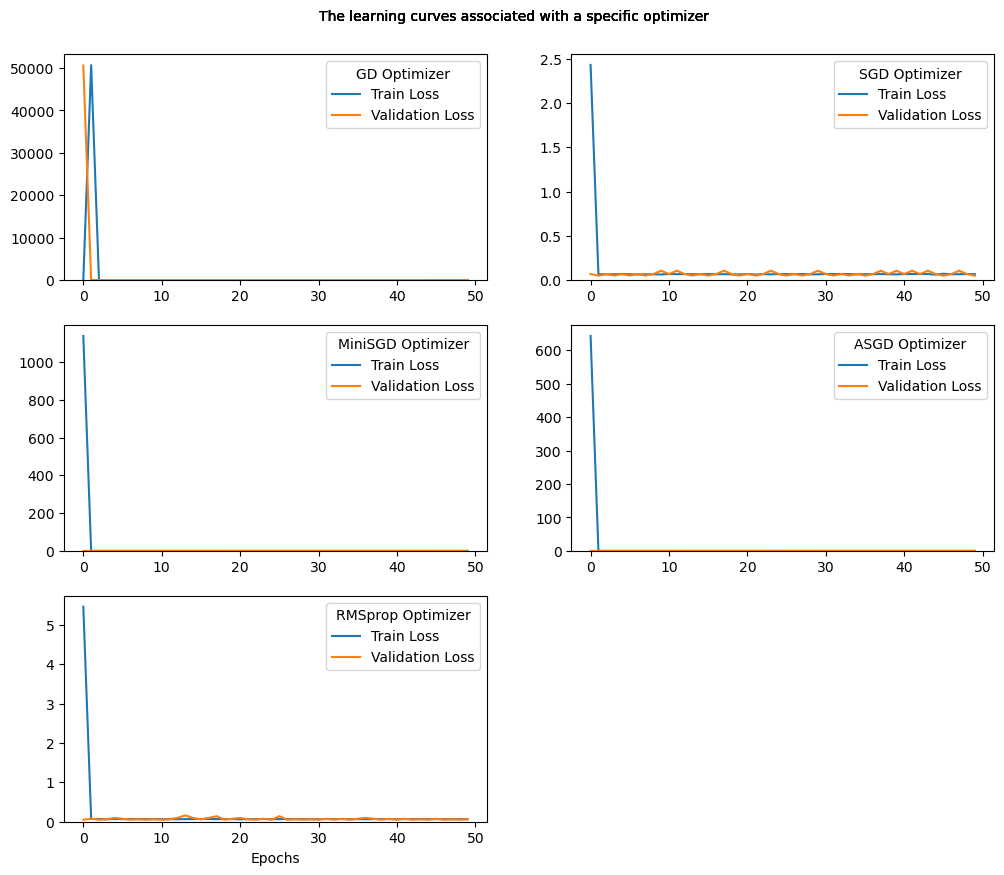

In [36]:
plt.figure(figsize=(12, 17))

for nn_i, nn_name in enumerate(optimizer.keys()):
    plt.subplot(len(history_torch), 2, (nn_i+1))
    plt.plot(history_torch[nn_name][0], label='Train Loss')
    plt.plot(history_torch[nn_name][1], label='Validation Loss')
    if nn_i==len(optimizer.keys())-1: plt.xlabel('Epochs')
    plt.ylim(bottom=0)
    plt.legend(title=nn_name+' Optimizer')
    plt.figtext(0.5, 0.9, 'The learning curves associated with a specific optimizer', wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

#### GD Results

In [37]:
history_torch['GD']

([65.82936096191406,
  50688.64453125,
  4.896852016448975,
  4.846851825714111,
  4.796852111816406,
  4.746851921081543,
  4.696852207183838,
  4.646852016448975,
  4.596851348876953,
  4.546852111816406,
  4.496851921081543,
  4.446852207183838,
  4.396851539611816,
  4.346851825714111,
  4.2968525886535645,
  4.246851921081543,
  4.19685173034668,
  4.146852016448975,
  4.096851348876953,
  4.046852111816406,
  3.996852159500122,
  3.9468512535095215,
  3.8968520164489746,
  3.8468515872955322,
  3.7968523502349854,
  3.746851921081543,
  3.696852207183838,
  3.6468520164489746,
  3.5968523025512695,
  3.5468523502349854,
  3.496852159500122,
  3.4468517303466797,
  3.396852493286133,
  3.3468525409698486,
  3.2968523502349854,
  3.2468526363372803,
  3.196852684020996,
  3.1468520164489746,
  3.0968525409698486,
  3.0468523502349854,
  2.9968528747558594,
  2.946852207183838,
  2.896852731704712,
  2.8468525409698486,
  2.7968528270721436,
  2.7468528747558594,
  2.696852922439575

In [38]:
history_GD = history_torch['GD']

#history_GD is a tuple where the first element is loss and the second is val_loss
history_fits_GD = history_GD[0]  
history_val_fits_GD = history_GD[1]  

In [39]:
history_fits_GD

[65.82936096191406,
 50688.64453125,
 4.896852016448975,
 4.846851825714111,
 4.796852111816406,
 4.746851921081543,
 4.696852207183838,
 4.646852016448975,
 4.596851348876953,
 4.546852111816406,
 4.496851921081543,
 4.446852207183838,
 4.396851539611816,
 4.346851825714111,
 4.2968525886535645,
 4.246851921081543,
 4.19685173034668,
 4.146852016448975,
 4.096851348876953,
 4.046852111816406,
 3.996852159500122,
 3.9468512535095215,
 3.8968520164489746,
 3.8468515872955322,
 3.7968523502349854,
 3.746851921081543,
 3.696852207183838,
 3.6468520164489746,
 3.5968523025512695,
 3.5468523502349854,
 3.496852159500122,
 3.4468517303466797,
 3.396852493286133,
 3.3468525409698486,
 3.2968523502349854,
 3.2468526363372803,
 3.196852684020996,
 3.1468520164489746,
 3.0968525409698486,
 3.0468523502349854,
 2.9968528747558594,
 2.946852207183838,
 2.896852731704712,
 2.8468525409698486,
 2.7968528270721436,
 2.7468528747558594,
 2.696852922439575,
 2.64685320854187,
 2.596853017807007,
 2.546

### Step 6: Wilcoxon test

In [40]:
# Assuming history_fits and history_val_fits are your two sets of observations
statistic, p_value = wilcoxon(history_fits_GD, history_val_fits_GD)

print("Wilcoxon test statistic:", statistic)
print("p-value:", p_value)

Wilcoxon test statistic: 49.0
p-value: 4.9604764740251994e-11


In [41]:
_, p_value = wilcoxon(history_fits_GD, history_val_fits_GD)

if p_value < 0.05:
    print("Significant difference detected (p-value < 0.05)")
else:
    print("No significant difference (p-value >= 0.05)")

Significant difference detected (p-value < 0.05)


## To compare with the other models

In [42]:
# Calculating a Loss Function Used Root Mean Squared Error, to compare all models
def rmse_loss(output, target):
    return torch.sqrt(F.mse_loss(output, target))

In [43]:
# Training a Neural networks with the best optimizer and the new loss function

Num_epochs = 50

history_torch_RMSE = {'GD': nn_torch['GD'].train(
    loss_fn=rmse_loss,  
    optimizer=optimizer['GD'], 
    num_epochs=num_epochs, 
    train_dl=train_dl_GD, 
    train_size=train_size, 
    batch_size=batch_size_GD,
    x_valid=X_val, y_valid=y_val
)}
print('GD train finished\n')

  0%|                                                    | 0/50 [00:00<?, ?it/s]/var/folders/pq/lc194v4s7_70hw34cy6f_yym0000gn/T/ipykernel_2145/3418109000.py:3: UserWarning: Using a target size (torch.Size([151, 1])) that is different to the input size (torch.Size([151])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return torch.sqrt(F.mse_loss(output, target))
/var/folders/pq/lc194v4s7_70hw34cy6f_yym0000gn/T/ipykernel_2145/3418109000.py:3: UserWarning: Using a target size (torch.Size([66, 1])) that is different to the input size (torch.Size([66])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return torch.sqrt(F.mse_loss(output, target))
100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 377.68it/s]

GD train finished



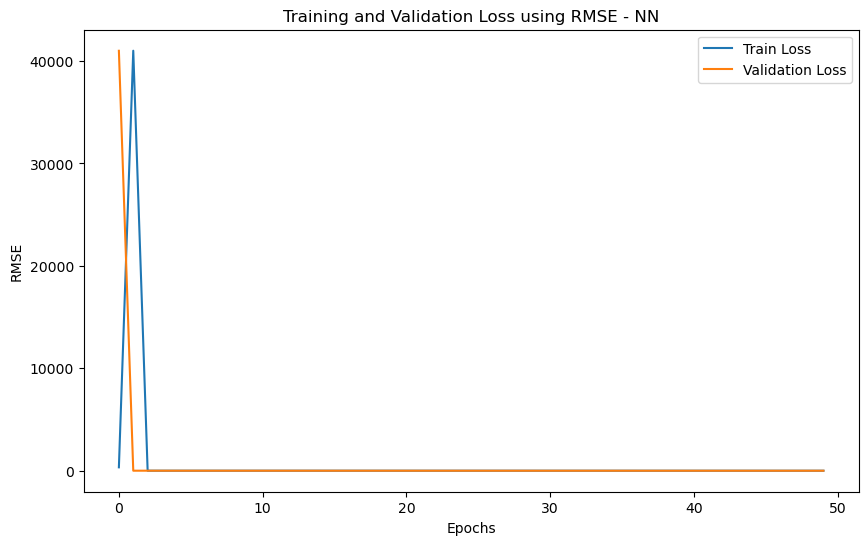

In [45]:
plt.figure(figsize=(10, 6))

plt.plot(history_torch_RMSE['GD'][0], label='Train Loss')
plt.plot(history_torch_RMSE['GD'][1], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Validation Loss using RMSE - NN')
plt.legend()

plt.show()